In [1]:
import torch

In [2]:
# Hack to import from a parent directory
import sys
path = '..'
if path not in sys.path:
    sys.path.append(path)

from plot_offline import *
fig_dir = '../figs'

## Truncated-normal theta distribution

In [4]:
net_file = '../training_pt_outputs/net_iter_405000_t_1000_dt_1.0_batch_32_layers_5_lr_0.0005_sd_scale_0.333_SCONR_C_fix_u_M_a_Ea_trunc_2021_08_13_11_31_07.pt'
#kf_file = '../training_pt_outputs/kf_fix_a_trunc.pt'
p_file = '../training_pt_outputs/p_theta_iter_405000_t_1000_dt_1.0_batch_32_layers_5_lr_0.0005_sd_scale_0.333_SCONR_C_fix_u_M_a_Ea_trunc_2021_08_13_11_31_07.pt'
q_file = '../training_pt_outputs/q_theta_iter_405000_t_1000_dt_1.0_batch_32_layers_5_lr_0.0005_sd_scale_0.333_SCONR_C_fix_u_M_a_Ea_trunc_2021_08_13_11_31_07.pt'
theta_file = '../generated_data/SCONR_C_fix_u_M_a_Ea_trunc_sample_y_t_1000_dt_0-01_sd_scale_0-333_rsample.pt'

In [ ]:
plot_states(net_file, kf_file, 'states_fix_a_trunc_each.png', fig_dir=fig_dir, summarize_net=False,
            ymin_list = [0, 0, 0], ymax_list = [100., 12., 13.], num_samples=50)

In [ ]:
plot_states(net_file, kf_file, 'states_fix_a_trunc.png', fig_dir=fig_dir,
            ymin_list = [0, 0, 0], ymax_list = [100., 12., 13.], num_samples=50)

In [ ]:
plot_theta(p_file, q_file, theta_file, 'theta_fix_a_trunc.png', fig_dir=fig_dir)

## Logit-normal theta distribution

In [ ]:
net_file = '../training_pt_outputs/net_iter_450000_t_1000_dt_1.0_batch_32_layers_5_lr_0.0005_sd_scale_0.333_SCONR_C_fix_a_logit_alt_2021_08_05_05_35_54.pt'
kf_file = '../training_pt_outputs/kf_fix_a_logit_alt.pt'
p_file = '../training_pt_outputs/p_theta_iter_450000_t_1000_dt_1.0_batch_32_layers_5_lr_0.0005_sd_scale_0.333_SCONR_C_fix_a_logit_alt_2021_08_05_05_35_54.pt'
q_file = '../training_pt_outputs/q_theta_iter_450000_t_1000_dt_1.0_batch_32_layers_5_lr_0.0005_sd_scale_0.333_SCONR_C_fix_a_logit_alt_2021_08_05_05_35_54.pt'
theta_file = '../generated_data/SCONR_C_fix_a_logit_alt_sample_y_t_1000_dt_0-01_sd_scale_0-333_rsample.pt'

In [ ]:
plot_states(net_file, kf_file, 'states_fix_a_logit_each.png', fig_dir=fig_dir, summarize_net=False,
            ymin_list = [0, 0, 0], ymax_list = [100., 12., 10.], num_samples=50)

In [ ]:
plot_states(net_file, kf_file, 'states_fix_a_logit.png', fig_dir=fig_dir,
            ymin_list = [0, 0, 0], ymax_list = [100., 12., 10.], num_samples=50)

In [ ]:
plot_theta(p_file, q_file, theta_file, 'theta_fix_a_logit.png', fig_dir=fig_dir)

## ELBO

In [ ]:
elbo_file = '../training_pt_outputs/ELBO_iter_450000_t_1000_dt_1.0_batch_15_layers_5_lr_0.0005_sd_scale_0.333_trunc_2021_07_18_10_20_15.pt'

In [ ]:
elbo_hist = torch.load(elbo_file, map_location=torch.device('cpu'))

In [ ]:
plt.plot(elbo_hist[200000:], linewidth=1)

In [ ]:
q_theta = torch.load('../this_week/q_theta_trunc.pt', map_location=torch.device('cpu'))
p_theta = torch.load('../this_week/p_theta_trunc.pt', map_location=torch.device('cpu'))
theta = torch.load('../this_week/theta_trunc.pt')

In [ ]:
i = q_theta.keys.index('c_SOC')
theta['c_SOC']

In [ ]:
p_theta.loc[i], p_theta.scale[i]

In [ ]:
lower = q_theta.lowers
upper = q_theta.uppers
p_theta.loc[i], p_theta.scale[i], lower[i], upper[i]

In [ ]:
from TruncatedNormal import *
x = torch.from_numpy(np.linspace(0, 0.2, 10000))
pdf = TruncatedNormal(p_theta.loc[i], p_theta.scale[i], lower[i], upper[i]).log_prob(x)

In [ ]:
x

In [ ]:
x.shape

In [ ]:
plt.plot(x[:, i], pdf[:, i])

In [ ]:
p_theta.mean

In [ ]:
p_theta.stddev

# Archive

In [ ]:
import torch.distributions as D


In [ ]:
from LogitNormal import *
from TruncatedNormal import *

In [ ]:
x = RescaledLogitNormal()

In [ ]:
x.mean

In [ ]:
x.variance

In [ ]:
x.stddev

### Visualizing $\theta$

TODO:
- Add true theta value
- (Maybe) zoom in

/usr/local/lib/python3.9/site-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'mean_field.MeanField' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


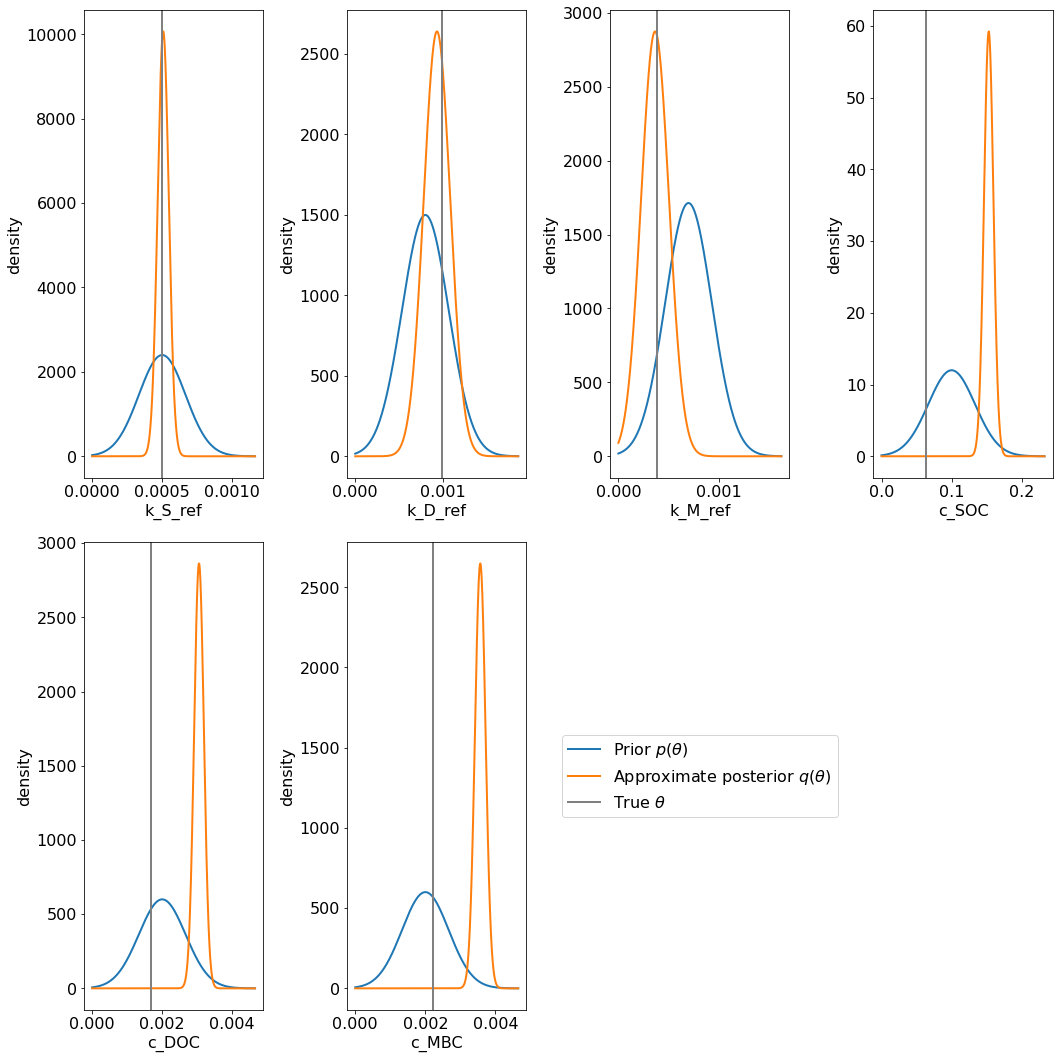

In [5]:
plot_theta(p_file, q_file, theta_file, 'fix_u_M_a_Ea.png')

In [ ]:
'/'.join(['dir', 'file.png'])

In [ ]:
p_file = '../results/p_theta_trunc.pt'
q_file = '../results/q_theta_trunc.pt'
plot_theta(p_file, q_file)

In [ ]:
loc = q_theta.means
scale = torch.maximum(q_theta.sds, torch.tensor(1e-6))
lower = q_theta.lowers
upper = q_theta.uppers
q_dist = q_theta.dist(loc, scale, a = lower, b = upper)

In [ ]:
num_pts = 1000
x = torch.from_numpy(np.linspace(lower, upper, num_pts)) # (num_pts, event_shape)

In [ ]:
pdf = torch.exp(q_dist.log_prob(x)) # (num_pts, event_shape)

In [ ]:
x.shape, pdf.shape

In [ ]:
plt.plot(x[:, 0], pdf.detach()[:, 0])

In [ ]:
plt.plot(x[:, 0], pdf.detach()[:, 0])

In [ ]:
q_theta.keys

In [ ]:
q_theta.dist

In [ ]:
p_dist = torch.load('../results/p_theta_logit.pt')

In [ ]:
torch.load('../results/p_theta_trunc.pt')

In [ ]:
torch.load('../results/p_theta_logit.pt')

In [ ]:
p_dist.sigmoid

In [ ]:
fig, axes = plt.subplots(2, 2)

In [ ]:
theta_trunc = torch.load('SCON_C_trunc_sample_y_t_1000_dt_0-01_sd_scale_0-333_rsample.pt')

In [ ]:
theta_trunc

### Visualizing `net`

TODO:
- Add Kalman smoother results
- Remove obs stddev

In [ ]:
def plot_net(net_file, kf_file, num_samples=10, ymin_list=None, ymax_list=None, device=torch.device('cpu')):
    # Load net object
    net = torch.load(net_file, map_location=device)
    obs_model, state_dim, t, dt = net.obs_model, net.state_dim, net.t, net.dt
    
    # Load KalmanFilter object
    kf = torch.load(kf_file, map_location=device)
    
    # Draw samples of x
    net.device = device
    net.eval()
    x, _ = net(num_samples)
    
    # Define figure and axes objects
    state_list = ['SOC', 'DOC', 'MBC', 'EEC']
    fig, axs = plt.subplots(state_dim, figsize=(15, 15))
    if ymin_list is None:
        ymin_list = [None] * state_dim
    if ymax_list is None:
        ymax_list = [None] * state_dim
    
    for i in range(state_dim):
        net_mean, net_sd = x[:, :, i].mean(0).detach(), x[:, :, i].std(0).detach()
        kf_mean, kf_sd = kf.mu_smooth[:, i], kf.sigma_smooth[:, i, i].sqrt()
        hours = torch.arange(0, t + dt, dt)
        
        # Plot net posterior
        axs[i].plot(hours, net_mean, label = 'SDE flow mean')
        axs[i].fill_between(hours, net_mean - 2 * net_sd, net_mean + 2 * net_sd,
                            alpha = 0.4, label = 'SDE flow $\\mu \pm 2\sigma_x$')
        
        # Plot kf posterior
        axs[i].plot(hours, kf_mean, label = 'Kalman smoother mean')
        axs[i].fill_between(hours, kf_mean - 2 * kf_sd, kf_mean + 2 * kf_sd,
                            alpha = 0.4, label = 'Kalman smoother $\\mu \pm 2\sigma_x$')
        
        # Plot observations
        axs[i].plot(obs_model.times, obs_model.mu[i, :], linestyle = 'None', marker = '.', label = 'Observed')
        #axs[i].fill_between(obs_model.times, obs_model.mu[i, :] - 2 * obs_model.scale[:, i], obs_model.mu[i, :] + 2 * obs_model.scale[:, i], alpha = 0.4, label = 'Observation $\\mu \pm 2\sigma_y$')
        
        state = state_list[i]
        axs[i].set_ylabel(state) #plt.setp(axs[i], ylabel = state)
        ymin = ymin_list[i]
        ymax = ymax_list[i]
        axs[i].set_ylim([ymin, ymax])
        #plt.title(f'Approximate posterior $q(x|\\theta, y)$\nNumber of samples = {eval_batch_size}\nTimestep = {dt}\nIterations = {niter}')
    
    axs[i].legend()
    plt.xlabel('Hour')

In [ ]:
net_file = '../results/net_trunc.pt'
kf_file = '../results/kf_trunc.pt'
plot_net(net_file, kf_file)

In [ ]:
torch.load('../results/kf_trunc.pt')

In [ ]:
troch

In [ ]:
def plot_post(data, state_idx, plot_sd=False, show_legend=True, labels=['SOC', 'DOC', 'MBC']):
    #plt.figure(figsize=(7, 6))
    obs = data[:, state_idx]
    mean_filter = kf.mu_filter[:, state_idx]
    mean_smooth = kf.mu_smooth[:, state_idx]
    
    if plot_sd:
        sd_filter = kf.sigma_filter[:, state_idx, state_idx].sqrt()
        #rv_filter = dist.normal.Normal(mean_filter, sd_filter)
        #plt.fill_between(T_span, rv_filter.icdf(torch.tensor(0.05)), rv_filter.icdf(torch.tensor(0.95)),
        #                 alpha=0.5, linewidth=0,
        #                 label='Filtered 5-95th percentile')
        plt.fill_between(T_span, mean_filter - 2*sd_filter, mean_filter + 2*sd_filter, alpha=0.5,
                         linewidth=0, label='Filtered $\\mu \pm 2\sigma$')
        
        sd_smooth = kf.sigma_smooth[:, state_idx, state_idx].sqrt()
        #rv_smooth = dist.normal.Normal(mean_smooth, sd_smooth)
        #plt.fill_between(T_span, rv_smooth.icdf(torch.tensor(0.05)), rv_smooth.icdf(torch.tensor(0.95)),
        #                 alpha=0.5, linewidth=0,
        #                 label='Smoothed 5-95th percentile')
        plt.fill_between(T_span, mean_smooth - 2*sd_smooth, mean_smooth + 2*sd_smooth, alpha=0.5,
                         linewidth=0, label='Smoothed $\\mu \pm 2\sigma$')
        
    plt.plot(T_span, mean_filter, label='Filtered mean')
    plt.plot(T_span, mean_smooth, label='Smoothed mean')
    plt.plot(obs_times, obs, linestyle='None', marker='o', label='Observed')
    
    plt.xlabel('Hour')
    plt.ylabel(labels[state_idx])
    plt.title('True posterior $q(x|\\theta, y)$')
    if show_legend: plt.legend()

In [ ]:
net.dt, net.t

In [ ]:
device = torch.device('cpu')
p_dist = torch.load('../this_week/p_theta_logit.pt', map_location=device)

In [ ]:
q_theta = torch.load('../this_week/q_theta_logit.pt', map_location=device)
loc = q_theta.means
scale = torch.max(q_theta.sds, torch.tensor(1e-6))
lower = q_theta.lowers
upper = q_theta.uppers
q_dist = q_theta.dist(loc, scale, a = lower, b = upper)

In [ ]:
x0 = torch.min(q_dist.mean - 4*q_dist.stddev, p_dist.mean - 4*p_dist.stddev)
x0 = torch.max(x0, lower).detach()
x0

In [ ]:
q_dist.stddev

In [ ]:
x1 = torch.max(q_dist.mean + 4*q_dist.stddev, p_dist.mean + 4*p_dist.stddev)
x1 = torch.min(x1, upper).detach()
x1

In [ ]:
# Load prior distribution
    p_dist = torch.load(p_theta_file, map_location=device)
    
    # Load posterior distribution
    q_theta = torch.load(q_theta_file, map_location=device)
    loc = q_theta.means
    scale = torch.max(q_theta.sds, torch.tensor(1e-6))
    lower = q_theta.lowers
    upper = q_theta.uppers
    q_dist = q_theta.dist(loc, scale, a = lower, b = upper)
    
    # Load true theta
    true_theta = torch.load(true_theta_file, map_location=device)

    # Define plot boundaries
    #print(q_dist, q_dist.loc, q_dist.scale, q_dist.mean, q_dist.stddev)
    #print(p_dist, p_dist.loc, p_dist.scale, p_dist.mean, p_dist.stddev)

    x0 = torch.min(q_dist.mean - 4*q_dist.stddev, p_dist.mean - 4*p_dist.stddev)
    x0 = torch.max(x0, lower).detach()
    #print(x0)
    
    x1 = torch.max(q_dist.mean + 4*q_dist.stddev, p_dist.mean + 4*p_dist.stddev)
    x1 = torch.min(x1, upper).detach()

In [ ]:
from matplotlib import cm
cm.get_cmap('tab10')(0)

In [ ]:
import torch.distributions as D
MVN = D.multivariate_normal.MultivariateNormal(torch.zeros(3), torch.eye(3))

In [ ]:
MVN.covariance_matrix